In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dfs = []
def load_and_label(filename, label):
    df = pd.read_csv(filename)
    df['label'] = label
    df = df.drop(df.loc[df['Name'] != 'Aggregated'].index, axis=0)
    return df

filenames_labels = [
    ('data/300_python_com_requests.csv', '300_python_com'),
    ('data/500_python_com_requests.csv', '500_python_com'),
    ('data/300_python_sem_requests.csv', '300_python_sem'),
    ('data/500_python_sem_requests.csv', '500_python_sem'),
]
for filename, label in filenames_labels:
    df = load_and_label(filename, label)
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
data

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,label
0,NaN,Aggregated,19385,0,45.0,84.916411,1.831419,2165.171881,10282.297498,622.214952,...,81,100,190,300,630,790,1300,2100,2200,300_python_com
1,NaN,Aggregated,30719,0,49.0,259.834057,1.860158,16690.670085,10209.781471,599.148737,...,250,270,420,1300,2200,2700,5800,16000,17000,500_python_com
2,NaN,Aggregated,1001,19,4100.0,3878.671439,156.745827,9642.678170,3275.794206,32.310324,...,5300,5700,6400,6800,7500,7800,9500,9600,9600,300_python_sem
3,NaN,Aggregated,1503,18,5500.0,5933.171944,161.993961,28969.169617,4621.870259,29.446216,...,7900,8400,10000,13000,16000,18000,25000,29000,29000,500_python_sem


In [29]:
by_label = data.groupby(['label'])

In [30]:
rps = by_label['Requests/s'].mean()
rps

label
300_python_com    622.214952
300_python_sem     32.310324
500_python_com    599.148737
500_python_sem     29.446216
Name: Requests/s, dtype: float64

<Axes: title={'center': 'Requests/s'}, xlabel='label'>

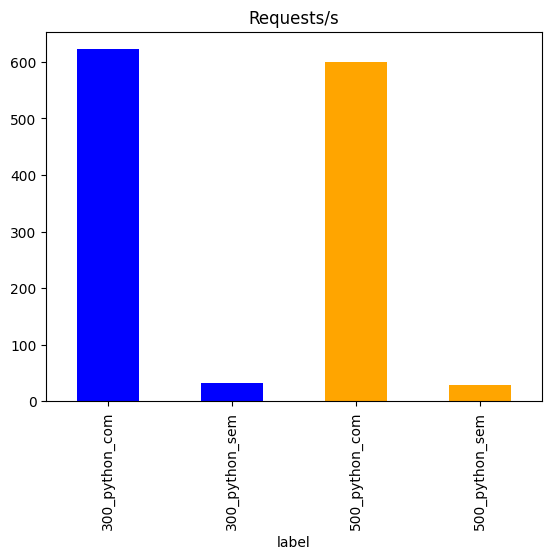

In [31]:
by_label['Requests/s'].mean().plot(kind='bar', title='Requests/s', color=['blue', 'blue', 'orange', 'orange'])

<Axes: title={'center': 'Tempo de resposta médio (ms)'}, xlabel='label'>

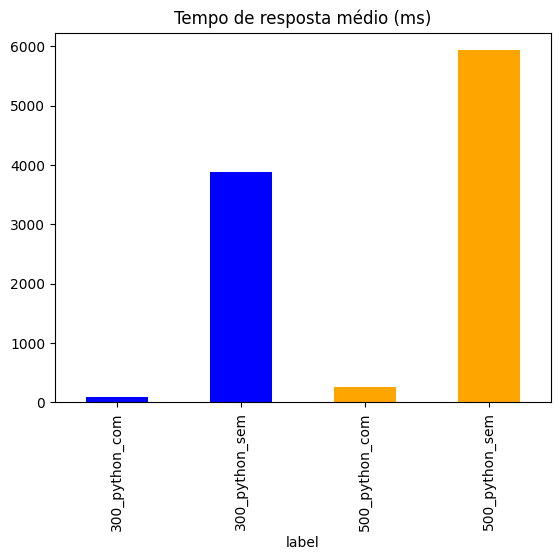

In [34]:
by_label['Average Response Time'].mean().plot(kind='bar', title='Tempo de resposta médio (ms)', color=['blue', 'blue', 'orange', 'orange'])

<Axes: title={'center': 'Total de requisições'}, xlabel='label'>

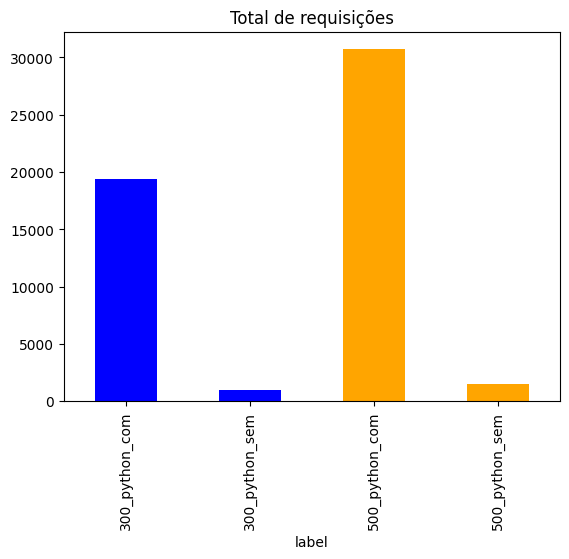

In [36]:
by_label['Request Count'].mean().plot(kind='bar', title='Total de requisições', color=['blue', 'blue', 'orange', 'orange'])

<Axes: title={'center': 'Quantidade de falhas'}, xlabel='label'>

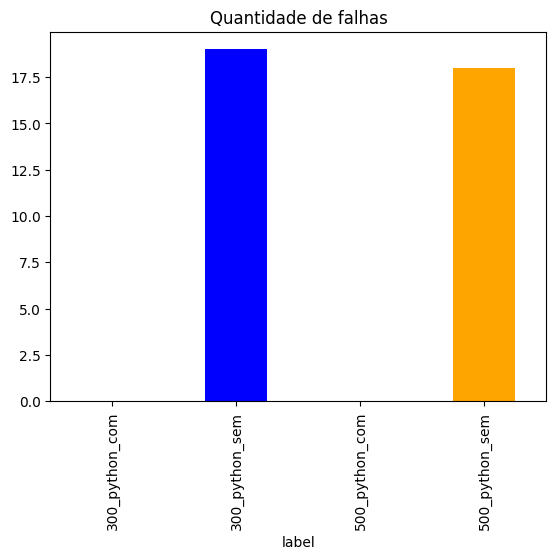

In [38]:
by_label['Failure Count'].mean().plot(kind='bar', title='Quantidade de falhas', color=['blue', 'blue', 'orange', 'orange'])

<Axes: title={'center': 'Percentil 95% (ms)'}, xlabel='label'>

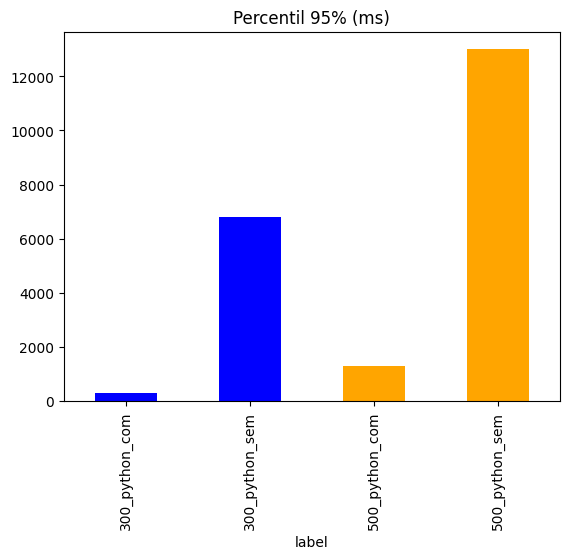

In [39]:
by_label['95%'].mean().plot(kind='bar', title='Percentil 95% (ms)', color=['blue', 'blue', 'orange', 'orange'])